In [53]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
import cPickle as pickle
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras import optimizers

In [34]:
keras.backend.backend()

u'theano'

In [2]:
train_data, train_labels = pickle.load(open('data/training.pkl', 'rb'))

In [24]:
q=[1,2,1,3]
w = np.zeros((4, 4))
w[range(4), q]=1
w

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [48]:
X = train_data
y = map(lambda x: len(str(x)), train_labels)
y = np.array(y)
y[y>5] = 6
y_ = np.zeros((y.shape[0], 6))
y_[range(y.shape[0]), y-1] = 1
# y = y_

In [49]:
y

array([2, 2, 2, ..., 2, 2, 3])

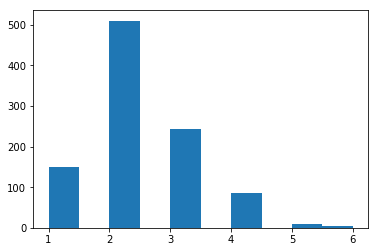

In [51]:
plt.hist(y[:1000])
plt.show()

In [37]:
X = X[:1000]
y_ = y_[:1000]

In [ ]:
IMAGE_WIDTH = 54
IMAGE_HEIGHT = 54
num_classes = 4000

model = Sequential()

model.add(Conv2D(48, (5, 5), padding='same',
                 input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 1)))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(160, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(3072))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(Dense(6))
model.add(Activation('softmax'))

opt = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(X, y_, epochs=10, batch_size=128, validation_split=0.2, verbose=1)
model.save_weights("./model/first_one.h5")
print('Saved model')


Train on 26721 samples, validate on 6681 samples
Epoch 1/10
 7808/26721 [=======>......................] - ETA: 1168s - loss: 1.7479 - acc: 0.4657    